In [14]:
import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn_extra.cluster import KMedoids

# Load data from CSV file
data = pd.read_csv('Data Process.csv', sep=';')

# Exclude the first data row
data = data.iloc[1:]

# Replace commas (,) with periods (.) and convert to float
data['Peng Sem 1'] = data['Peng Sem 1'].str.replace(',', '.').astype(float)
data['Peng Sem 2'] = data['Peng Sem 2'].str.replace(',', '.').astype(float)
data['Ket Sem 1'] = data['Ket Sem 1'].str.replace(',', '.').astype(float)
data['Ket Sem 2'] = data['Ket Sem 2'].str.replace(',', '.').astype(float)

# Extract attributes from the data
attributes = ['Nama', 'Peng Sem 1', 'Ket Sem 1', 'Peng Sem 2', 'Ket Sem 2']
X = data[attributes].values

# Perform pairwise distance calculation
distances = pairwise_distances(X[:, 1:], metric='euclidean')

# Function to calculate the total dissimilarity for a given medoid index
def total_dissimilarity(index, medoids):
    cluster_indices = np.where(medoids)[0]
    cluster_points = X[cluster_indices]
    cluster_distances = distances[cluster_indices][:, cluster_indices]
    return sum(cluster_distances)

# Function to find the best medoid with the lowest dissimilarity
def find_best_medoid(cluster_points, cluster_indices):
    best_medoid = None
    best_dissimilarity = float('inf')
    for i in range(len(cluster_points)):
        dissimilarity = total_dissimilarity(i, cluster_indices)
        if np.all(dissimilarity < best_dissimilarity):
            best_medoid = cluster_indices[i]  # Update with cluster index
            best_dissimilarity = dissimilarity
    return best_medoid, best_dissimilarity

# Perform K-Medoids clustering
k = 3  # Number of clusters
medoids_indices = KMedoids(n_clusters=k, random_state=0).fit_predict(distances)

# Find the best medoid for each cluster
medoids = []
for cluster_id in range(k):
    cluster_indices = np.where(medoids_indices == cluster_id)[0]
    cluster_points = X[cluster_indices]
    medoid_index, _ = find_best_medoid(cluster_points, cluster_indices)
    medoids.append(medoid_index)

# Retrieve all attributes from data
all_attributes = X

# Create a new DataFrame with cluster assignments
cluster_data = pd.DataFrame(all_attributes, columns=attributes)
cluster_data['Cluster'] = medoids_indices + 1

# Save the DataFrame to a new CSV file
cluster_data.to_csv('Clustered_Data.csv', index=False)
cluster_counts = cluster_data['Cluster'].value_counts()
print(cluster_counts)

2    95
1    85
3    66
Name: Cluster, dtype: int64


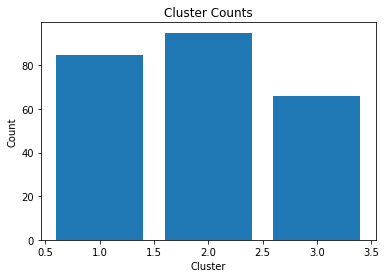

In [15]:
import matplotlib.pyplot as plt

# Plotting the cluster counts
plt.bar(cluster_counts.index, cluster_counts.values)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Cluster Counts')
plt.show()

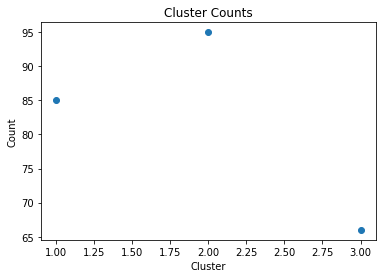

In [16]:
import matplotlib.pyplot as plt

# Generate scatter plot for cluster counts
plt.scatter(cluster_counts.index, cluster_counts.values)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Cluster Counts')
plt.show()

In [18]:
import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn_extra.cluster import KMedoids

# Load data from CSV file
data = pd.read_csv('Data Process.csv', sep=';')

# Exclude the first data row
data = data.iloc[1:]

# Replace commas (,) with periods (.) and convert to float
data['Peng Sem 1'] = data['Peng Sem 1'].str.replace(',', '.').astype(float)
data['Peng Sem 2'] = data['Peng Sem 2'].str.replace(',', '.').astype(float)
data['Ket Sem 1'] = data['Ket Sem 1'].str.replace(',', '.').astype(float)
data['Ket Sem 2'] = data['Ket Sem 2'].str.replace(',', '.').astype(float)

# Extract attributes from the data
attributes = ['Nama', 'Peng Sem 1', 'Ket Sem 1', 'Peng Sem 2', 'Ket Sem 2']
X = data[attributes].values

# Perform pairwise distance calculation
distances = pairwise_distances(X[:, 1:], metric='euclidean')

# Function to calculate the total dissimilarity for a given medoid index
def total_dissimilarity(index, medoids):
    cluster_indices = np.where(medoids)[0]
    cluster_points = X[cluster_indices]
    cluster_distances = distances[cluster_indices][:, cluster_indices]
    return sum(cluster_distances)

# Function to find the best medoid with the lowest dissimilarity
def find_best_medoid(cluster_points, cluster_indices):
    best_medoid = None
    best_dissimilarity = float('inf')
    for i in range(len(cluster_points)):
        dissimilarity = total_dissimilarity(i, cluster_indices)
        if np.all(dissimilarity < best_dissimilarity):
            best_medoid = cluster_indices[i]  # Update with cluster index
            best_dissimilarity = dissimilarity
    return best_medoid, best_dissimilarity

# Perform K-Medoids clustering
k = 3  # Number of clusters
medoids_indices = KMedoids(n_clusters=k, random_state=0).fit_predict(distances)

# Find the best medoid for each cluster
medoids = []
for cluster_id in range(k):
    cluster_indices = np.where(medoids_indices == cluster_id)[0]
    cluster_points = X[cluster_indices]
    medoid_index, _ = find_best_medoid(cluster_points, cluster_indices)
    medoids.append(medoid_index)

# Retrieve all attributes from data
all_attributes = X

# Create a new DataFrame with cluster assignments
cluster_data = pd.DataFrame(all_attributes, columns=attributes)
cluster_data['Cluster'] = medoids_indices + 1

# Divide clusters
cluster_counts = cluster_data['Cluster'].value_counts()

# Divide cluster 1 into a, b, c
cluster_1_data = cluster_data[cluster_data['Cluster'] == 1]
cluster_1_divided = np.array_split(cluster_1_data, 3)
a, b, c = cluster_1_divided

# Add class labels for cluster 1 divisions
a['Class'] = 'Class A'
b['Class'] = 'Class B'
c['Class'] = 'Class C'

# Divide cluster 2 into d, e, f
cluster_2_data = cluster_data[cluster_data['Cluster'] == 2]
cluster_2_divided = np.array_split(cluster_2_data, 3)
d, e, f = cluster_2_divided

# Add class labels for cluster 2 divisions
d['Class'] = 'Class D'
e['Class'] = 'Class E'
f['Class'] = 'Class F'

# Divide cluster 3 into g, h
cluster_3_data = cluster_data[cluster_data['Cluster'] == 3]
cluster_3_divided = np.array_split(cluster_3_data, 2)
g, h = cluster_3_divided

# Add class labels for cluster 3 divisions
g['Class'] = 'Class G'
h['Class'] = 'Class H'

# Print the divided clusters with names, attributes, and classes
print("Cluster 1:")
print(a[['Nama', 'Peng Sem 1', 'Peng Sem 2', 'Ket Sem 1', 'Ket Sem 2', 'Class']])
print(b[['Nama', 'Peng Sem 1', 'Peng Sem 2', 'Ket Sem 1', 'Ket Sem 2', 'Class']])
print(c[['Nama', 'Peng Sem 1', 'Peng Sem 2', 'Ket Sem 1', 'Ket Sem 2', 'Class']])

print("Cluster 2:")
print(d[['Nama', 'Peng Sem 1', 'Peng Sem 2', 'Ket Sem 1', 'Ket Sem 2', 'Class']])
print(e[['Nama', 'Peng Sem 1', 'Peng Sem 2', 'Ket Sem 1', 'Ket Sem 2', 'Class']])
print(f[['Nama', 'Peng Sem 1', 'Peng Sem 2', 'Ket Sem 1', 'Ket Sem 2', 'Class']])

print("Cluster 3:")
print(g[['Nama', 'Peng Sem 1', 'Peng Sem 2', 'Ket Sem 1', 'Ket Sem 2', 'Class']])
print(h[['Nama', 'Peng Sem 1', 'Peng Sem 2', 'Ket Sem 1', 'Ket Sem 2', 'Class']])

# Save the divided clusters to a single CSV file
output_data = pd.concat([a, b, c, d, e, f, g, h], axis=0)
output_data.to_csv('divided_clusters.csv', index=False)

Cluster 1:
                                 Nama Peng Sem 1 Peng Sem 2 Ket Sem 1  \
1                       Alisya Kirana       82.6       85.6      82.4   
2            Calista Anggriani Marbun       82.7       83.7      82.7   
4              Dini Elisabet Dongoran       82.1       85.4      81.7   
6           Epifaniya Lebora Dongoran       85.7       88.7      85.4   
7                       Heni Sianturi       84.6       86.4      85.1   
13          Mateus Martuani Panjaitan       82.9       86.4      83.0   
14           Mega Rias Riyani Azzahra       81.0       84.1      81.1   
16                  Mike Roida Sormin       81.2       86.0      81.6   
18           Nadine Benedicta Naibaho       86.3       89.0      86.4   
24          Puput Yuni  Br, Matondang       83.3       85.4      83.5   
27      Santa Debora Teresia Sianturi       81.3       85.4      80.5   
29          THERESIA ROSALINDA NDRURU       85.2       88.5      84.5   
34               Boaz Jonathan Sormin   